Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


Load the Dataset

In [3]:

df = pd.read_csv("/content/advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Basic Exploration

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,0
TV,0
Radio,0
Newspaper,0
Sales,0


Data Preprocessing

In [5]:
df = df.dropna()
df = df.drop_duplicates()
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Split Features and Target

In [6]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Models

In [8]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42)
}

results = {}
best_model = None
best_mse = float("inf")

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} -> MSE: {mse:.4f}, R2: {r2:.4f}")

    if mse < best_mse:
        best_mse = mse
        best_model = model

print("\n✅ Best model selected:", best_model)


Linear Regression -> MSE: 2.9078, R2: 0.9059
Random Forest -> MSE: 1.4368, R2: 0.9535
XGBoost -> MSE: 1.4514, R2: 0.9530

✅ Best model selected: RandomForestRegressor(random_state=42)


Save Model and Scaler

In [9]:
joblib.dump(best_model, 'model.sav')
joblib.dump(scaler, 'scaler.sav')
print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


Make New Predictions

In [10]:
model = joblib.load('model.sav')
scaler = joblib.load('scaler.sav')
tv = 200
radio = 25
newspaper = 15

new_data = np.array([[tv, radio, newspaper]])
scaled_data = scaler.transform(new_data)
predicted_sales = model.predict(scaled_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 17.63


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Visualize Predictions

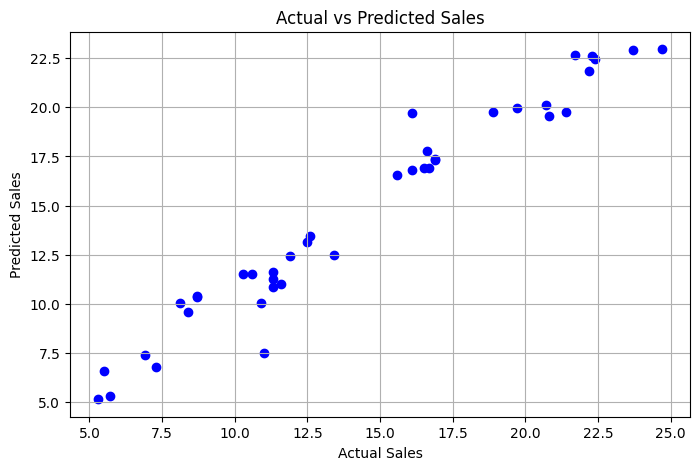

In [11]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()
